### Import Libraries

## Upto 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('movie_metadata.csv')

In [3]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
dataset.columns


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Dataset contains movies upto 2016 only

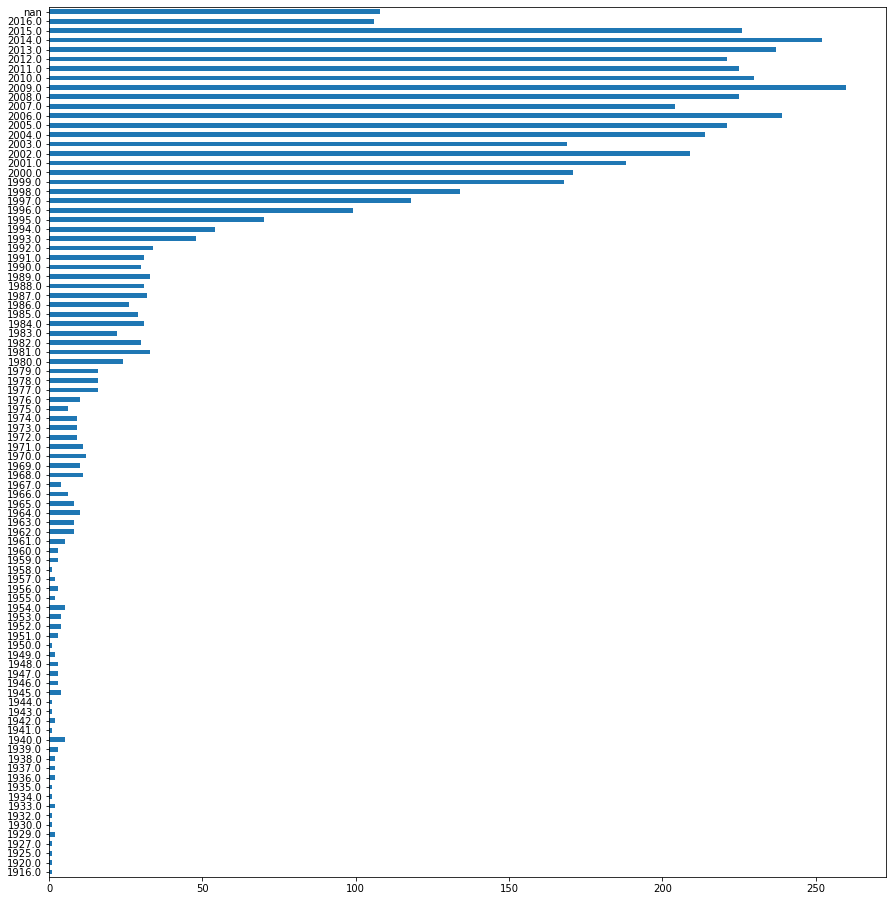

In [5]:
dataset.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

### We just made a dataset of only imp columns

In [6]:
dataset = dataset.loc[ : ,['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'genres', 'movie_title']]

In [7]:
dataset.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


### Replacing some NaN value with unknown as per bookmyshow

In [8]:
dataset['actor_1_name'] = dataset['actor_1_name'].replace(np.nan, 'Unknown')
dataset['actor_2_name'] = dataset['actor_2_name'].replace(np.nan, 'Unknown')
dataset['actor_3_name'] = dataset['actor_3_name'].replace(np.nan, 'Unknown')
dataset['director_name'] = dataset['director_name'].replace(np.nan, 'Unknown')

In [9]:
dataset

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,Unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [10]:
dataset['genres'] = dataset['genres'].str.replace('|', ' ')

In [11]:
dataset['movie_title'] = dataset['movie_title'].str.lower()

In [12]:
dataset['movie_title'][0]

'avatar\xa0'

### removing \xa0 from last

In [13]:
dataset['movie_title'] = dataset['movie_title'].apply(lambda x : x[:-1])

In [14]:
dataset['movie_title'][3]

'the dark knight rises'

### Taking all this processed data into data.csv

In [15]:
dataset.to_csv('data.csv', index=False)

## Upto 2017 and merging with previous one

In [16]:
dataset1 = pd.read_csv('credits.csv')

In [17]:
dataset1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [18]:
dataset2 = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
dataset2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Formatting Date and time

In [20]:
dataset2['release_date'] = pd.to_datetime(dataset2['release_date'], errors='coerce')

In [21]:
dataset2['year'] = dataset2['release_date'].dt.year

### Here we are getting no. of movies according to years now

In [22]:
dataset2['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

### Extracting only this columns only for 2017

In [23]:
new_dataset2 = dataset2.loc[dataset2.year == 2017,['genres','id','title','year']]

In [24]:
new_dataset2

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


### converting all id's  int type

In [25]:
new_dataset2['id'] = new_dataset2['id'].astype(int)

### Merging this data with data,csv

In [26]:
data = pd.merge(new_dataset2, dataset1, on='id')

In [27]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


### evaluates an expression node or a string containing a Python literal or container display

In [28]:
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

### Just reducing sci-friction into sci-fi :)

In [29]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [30]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [31]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

### For getting name of actor1

In [32]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [33]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [34]:
data['actor_1_name']

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor_1_name, Length: 531, dtype: object

### Same for actor 2

In [35]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [36]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [37]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [38]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [39]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [40]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [41]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [42]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [43]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [44]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


### Finding NuN value

In [45]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [46]:
movie = movie.dropna(how='any')

In [47]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [48]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [49]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [50]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

### And this is what we made, a data for 2017 movies only

In [51]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [52]:
old = pd.read_csv('data.csv')

In [53]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,Unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


### Here we are appending 2017 data to upto 2016 dataset

In [54]:
new = old.append(movie)

In [55]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


### Avoiding duplicate for not overwriting same data

In [56]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [57]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


### Adding into new dataset

In [58]:
new.to_csv('new_data.csv',index=False)

## For 2018 Movies Data

### Getting only the required columns from wikipedia

In [59]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [60]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [61]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[163]
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[137]
266,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[226]
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[258]


### Installing tmdbv3api to work with tmdb api

In [62]:
pip install tmdbv3api

In [63]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'db47f4d8f92f5ca02c7840f594a293ad'

In [64]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/550?api_key=db47f4d8f92f5ca02c7840f594a293ad'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

### Extracting genres

In [65]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [66]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Drama
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],Drama
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],Drama
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],Drama
...,...,...,...,...,...,...,...
264,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[163],Drama
265,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[137],Drama
266,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[226],Drama
267,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[258],Drama


In [67]:
df_2018 = df[['Title','Cast and crew','genres']]

In [68]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Drama
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Drama
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Drama
...,...,...,...
264,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Drama
265,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Drama
266,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Drama


### Extracting Director, Directors from the above data

In [69]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [70]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [72]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [74]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [76]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [77]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Drama,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Drama,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Drama,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
264,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Drama,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
265,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Drama,Adam McKay,Christian Bale,Amy Adams,Steve Carell
266,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
267,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Drama,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [78]:

df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [79]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [80]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Drama,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Drama,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Drama,The Commuter
...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Drama,Holmes & Watson
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Drama,Vice
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama,On the Basis of Sex
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Drama,Destroyer


In [81]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [82]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [83]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [84]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Drama,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Drama
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Drama
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Drama,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Drama
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Drama,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Drama
...,...,...,...,...,...,...,...
264,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Drama,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Drama
265,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Drama,vice,Christian Bale Amy Adams Steve Carell Adam McKay Drama
266,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama
267,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Drama,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Drama


## For 2019 Movies from Wikipedia

In [85]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [86]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [87]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[132]
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[221]
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures / Entertainment One,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[222]
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[223]


In [88]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [89]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,JANUARY,4,Escape Room,Columbia Pictures,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2],Drama
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3],Drama
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4],Drama
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5],Drama
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6],Drama
...,...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[132],Drama
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[221],Drama
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures / Entertainment One,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[222],Drama
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[223],Drama


In [90]:
df_2019 = df[['Title','Cast and crew','genres']]

In [91]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Drama
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Drama
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Drama
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Drama
...,...,...,...
237,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Drama
238,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama
239,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,Drama
240,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama


In [92]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [93]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [95]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [97]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [99]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [100]:
df_2019

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Drama,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Drama,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Drama,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Drama,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman
...,...,...,...,...,...,...,...
237,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Drama,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones
238,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh
239,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,Drama,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong
240,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson


In [101]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [102]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [103]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Drama,Escape Room
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Drama,Rust Creek
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Drama,American Hangman
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama,A Dog's Way Home
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Drama,The Upside
...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Drama,Spies in Disguise
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama,Little Women
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,Drama,1917
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama,Just Mercy


In [104]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [105]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [106]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [107]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Drama,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Drama
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Drama,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Drama
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Drama
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Drama,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Drama"
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes Drama
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama


### Merging df18 and df19

In [108]:
my_df = new_df18.append(new_df19, ignore_index=True)

In [109]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Drama,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Drama
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Drama
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Drama,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Drama
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Drama,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Drama
...,...,...,...,...,...,...,...
506,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Drama,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Drama"
507,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama
508,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes Drama
509,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama


In [110]:
old_df = pd.read_csv('new_data.csv')

In [111]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [112]:
final_df = old_df.append(my_df, ignore_index = True)

In [113]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
5870,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Drama,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Drama"
5871,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama
5872,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes Drama
5873,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama


In [114]:
final_df.to_csv('final_data.csv',index=False)

## Feature Extracting data from wikipedia for 2020

In [115]:
import bs4 as bs
import urllib.request

In [116]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [117]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [118]:
tables = soup.find_all('table',class_='wikitable sortable')

In [119]:
len(tables)

4

In [120]:
type(tables[0])

bs4.element.Tag

### avoided "ValueError: invalid literal for int() with base 10: '1"'

In [121]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] 

In [122]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [123]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2]
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3]
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4]
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5]
...,...,...,...,...,...,...
267,DECEMBER,25,We Can Be Heroes,Netflix / Troublemaker Studios,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",[240]
268,DECEMBER,25,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,[241]
269,DECEMBER,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",[242]
270,DECEMBER,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",[243]


In [124]:
df_2020 = df[['Title','Cast and crew']]

In [125]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
267,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
268,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
269,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
270,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [126]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

### Extracting Genres

In [127]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Drama Thriller Crime
...,...,...,...
267,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy
268,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Action Adventure Drama Western
269,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
270,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama


In [129]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [130]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [132]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [134]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

In [135]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [136]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [137]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",Drama Thriller Crime,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
267,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
268,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,Action Adventure Drama Western,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
269,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
270,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [138]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [139]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [140]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,Inherit the Viper
...,...,...,...,...,...,...
267,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,We Can Be Heroes
268,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Action Adventure Drama Western,News of the World
269,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
270,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [141]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [142]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      4
actor_3_name     27
genres            2
movie_title       0
comb             29
dtype: int64

In [143]:
new_df20 = new_df20.dropna(how='any')

In [144]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [145]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:

new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery ...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Ho...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Drama Thriller Crime,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Drama Thr...
...,...,...,...,...,...,...,...
266,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Family Animation Comedy Drama Music Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Family Animation Comedy D...
267,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
269,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
270,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [147]:
old_df = pd.read_csv('final_data.csv')

In [148]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
5870,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Drama,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Drama"
5871,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama
5872,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes Drama
5873,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama


### Final merging in dataset

In [149]:
final_df = old_df.append(new_df20,ignore_index=True)

In [150]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,NaN
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,NaN
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,NaN
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,NaN
4,Doug Walker,Doug Walker,Rob Walker,Unknown,Documentary,star wars: episode vii - the force awakens,NaN
...,...,...,...,...,...,...,...
6113,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Family Animation Comedy Drama Music Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Family Animation Comedy D...
6114,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Actio...
6115,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6116,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [151]:
final_df.to_csv('main_data.csv',index=False)

## Reviews/ Sentiments

In [152]:
import nltk
from nltk.corpus import stopwords
import pickle

In [153]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [155]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [156]:
StopWord = set(stopwords.words('english'))

### Bag of Word model

In [157]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase = True, strip_accents='ascii',stop_words=StopWord)
X = cv.fit_transform(dataset.Comments).toarray()
y = dataset.Reviews
pickle.dump(CountVectorizer, open('tranform.pkl', 'wb'))

### Spliting Dataset

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Naive Bayes Algorithm

In [159]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Predicting Test Set

In [160]:
y_pred = classifier.predict(X_test)

### Confusion matrix and accuracy score

In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[542  38]
 [ 12 792]]


96.38728323699422

In [162]:
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [163]:
accuracy_score(y_test, y_pred)*100

96.38728323699422

In [164]:
filename = 'nlp_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))